#  Taylor problem 5.36 (with Example 5.3 graphs)

last revised: 15-Jan-2019 by Dick Furnstahl [furnstahl.1@osu.edu]


This notebook generates the plots in Example 5.3 in Taylor.  **For problem 5.36, add an additional curve (do not replace the Example 5.3 curve) for the initial conditions in the problem.**

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# Maybe this should all be in a class.  How would you do that?

def A_eval(omega0, f0, omega, beta):
    """Amplitude function A for damped, driven oscillator."""
    return np.sqrt(
             f0**2/((omega0**2 - omega**2)**2 + 4. * beta**2 * omega**2)
           )

def delta_eval(omega0, omega, beta):
    """Phase function delta for damped, driven oscillator."""
    return np.arctan(2.*beta*omega/(omega0**2 - omega**2))

def B_coeffs(x0, v0, omega0, omega, beta):
    """B1 and B2 from initial conditions and amplitude and phase functions.
        Formulas from Taylor (5.70).
    """
    A = A_eval(omega0, f0, omega, beta)
    delta = delta_eval(omega0, omega, beta)
    omega1 = np.sqrt(omega0**2 - beta**2)
    B1 = x0 - A * np.cos(delta)
    B2 = (v0 - omega*A*np.sin(delta) + beta*B1)/omega1
    return B1, B2

def damped_driven(t, omega0, f0, omega, beta, B1, B2):
    """Solution to dampled driven harmonic oscillator."""
    omega1 = np.sqrt(omega0**2 - beta**2)
    A = A_eval(omega0, f0, omega, beta)
    delta = delta_eval(omega0, omega, beta)
    return A * np.cos(omega*t - delta) + np.exp(-beta*t) * \
           (B1 * np.cos(omega1 * t)  +  B2 * np.sin(omega1 * t))


def driving_force(t, f0, omega,):
    """External driving force as a function of time t."""
    return f0 * np.cos(omega*t)

In [31]:
omega = 2.*np.pi
omega0 = 5.*omega
beta = omega0/20.
f0 = 1000.

print(rf'A = {A_eval(omega0, f0, omega, beta):.5f}')
print(rf'delta = {delta_eval(omega0, omega, beta):.5f}')


A = 1.05520
delta = 0.02083


0.9450288904919277 0.04290940188560929


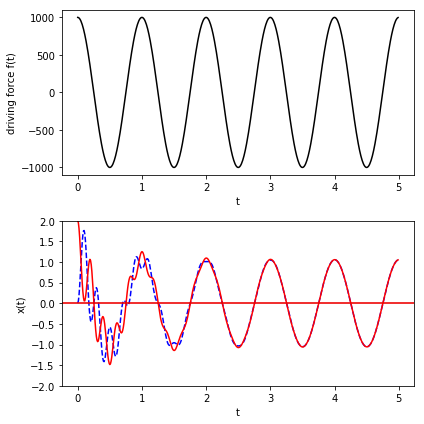

In [50]:
t_pts = np.arange(0., 5., 0.01)

x0 = 2.
v0 = 0.
B1, B2 = B_coeffs(x0, v0, omega0, omega, beta)
B_1 = -1.05
B_2 = -0.0572
print(B1, B2)
x_pts_1 = damped_driven(t_pts, omega0, f0, omega, beta, B_1, B_2)
x_pts_2 = damped_driven(t_pts, omega0, f0, omega, beta, B1, B2)
### Add the initial conditions for 5.36 and find the B coefficients and
###  x_pts_2.

fig = plt.figure(figsize=(6,6))

ax_drive = fig.add_subplot(2,1,1)  # driving force
ax_drive.plot(t_pts, driving_force(t_pts, f0, omega), color='black')
ax_drive.set_xlabel('t')
ax_drive.set_ylabel('driving force f(t)')

ax = fig.add_subplot(2,1,2)
ax.plot(t_pts, x_pts_1, color='blue', linestyle='dashed')
ax.plot(t_pts, x_pts_2, color='red', linestyle='solid')
ax.set_xlabel('t')
ax.set_ylabel('x(t)')
ax.set_ylim(-2., 2.)
ax.axhline(0., color='black', alpha=0.3)  # light black line for reference
ax.axhline(0., color='red', alpha=1)
### add another curve to ax for the 5.36 conditions (make it red and solid)

fig.tight_layout()